In [1439]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [1440]:
Integration = pd.read_csv('../../Data/study/03.통합_정규화.csv')
Integration.tail(17)
# 0.25가 젤 높은 군집이고 0.50이 두번째로 높은 군집 얘네는 별로 위험이 아님.
# 0.75가 세번째로 낮은 애들인데 뭐 거의 차이가 없다고 본다.
# 0.0 나오는 애들이 두번째로 낮은 애들인데 별 차이없음.
# 1 나오는 애들이 제일 낮은 지역임.
# 구분을 해보자. 0.25 = "위험없음", 0.50 = "양호", 0.75 = "소멸경고", 0.0 = "소멸위기", 1 = 소멸진행(근데 세종만 1임)

,시점,시도,총인구,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,예금은행대출금액,예금액,cluster
119,2013,경기도,0.910380,0.917273,0.987845,0.722646,0.960500,0.776750,0.339958,0.013776,0.25
120,2013,서울특별시,0.753220,0.815367,0.738139,1.000000,0.606175,0.760073,0.635611,0.592332,0.50
121,2013,부산광역시,0.255958,0.244302,0.219960,0.203562,0.201574,0.214863,0.103605,0.064875,0.75
122,2013,경상남도,0.241390,0.207586,0.252643,0.160305,0.240051,0.194295,0.075801,0.005956,0.75
123,2013,인천광역시,0.207265,0.215566,0.217549,0.170483,0.197767,0.176916,0.082833,0.033262,0.75
124,2013,경상북도,0.193710,0.160416,0.187705,0.139949,0.168028,0.138730,0.035957,0.037772,0.75
125,2013,대구광역시,0.178840,0.176790,0.162203,0.213740,0.169433,0.152346,0.061002,0.040335,0.75
126,2013,충청남도,0.144720,0.128457,0.155867,0.114504,0.143087,0.115372,0.033184,0.018502,0.00
127,2013,전라남도,0.134163,0.117580,0.127153,0.055980,0.120783,0.094549,0.018707,0.025479,0.00
128,2013,전라북도,0.131592,0.124568,0.119626,0.127226,0.128558,0.103780,0.027867,0.016236,0.00


In [1441]:
Integration.loc[Integration['cluster'] == 0.25,"위험지수"] = '위험없음'
Integration.loc[Integration['cluster'] == 0.50,"위험지수"] = '양호'
Integration.loc[Integration['cluster'] == 0.75,"위험지수"] = '소멸경고'
Integration.loc[Integration['cluster'] == 0.00,"위험지수"] = '소멸위기'
Integration.loc[Integration['cluster'] == 1.00,"위험지수"] = '소멸진행'

In [1442]:
Integration

,시점,시도,총인구,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,예금은행대출금액,예금액,cluster,위험지수
0,2020,경기도,1.000000,1.000000,0.681823,0.669211,0.989493,1.000000,0.576734,0.026286,0.25,위험없음
1,2020,서울특별시,0.717506,0.826711,0.412283,0.974555,0.527691,0.783734,1.000000,1.000000,0.50,양호
2,2020,부산광역시,0.245759,0.249388,0.124101,0.165394,0.192010,0.223664,0.179294,0.111145,0.75,소멸경고
3,2020,경상남도,0.241871,0.205622,0.139806,0.145038,0.240947,0.187088,0.111240,0.009975,0.75,소멸경고
4,2020,인천광역시,0.212003,0.226092,0.132839,0.147583,0.196469,0.203894,0.137688,0.056396,0.75,소멸경고
...,...,...,...,...,...,...,...,...,...,...,...,...
131,2013,대전광역시,0.106026,0.109410,0.115568,0.127226,0.113168,0.100671,0.029611,0.025211,0.00,소멸위기
132,2013,광주광역시,0.101524,0.108771,0.103378,0.109415,0.116652,0.094325,0.028538,0.018596,0.00,소멸위기
133,2013,울산광역시,0.077741,0.072153,0.090929,0.073791,0.078759,0.052201,0.023670,0.014746,0.00,소멸위기
134,2013,제주특별자치도,0.035450,0.033477,0.037523,0.048346,0.040838,0.035189,0.006765,0.000000,0.00,소멸위기


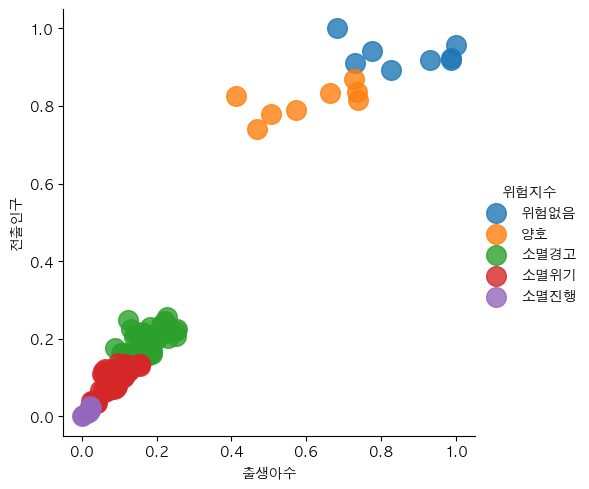

In [1443]:
sns.lmplot(x='출생아수', y='전출인구',
            data=Integration, fit_reg=False,
            scatter_kws={'s':200},
            hue="위험지수"
)
plt.show()

In [1444]:
Integration.columns

Index(['시점', '시도', '총인구', '전출인구', '출생아수', '산부인과의원수', '초등학생인원수', '도매 및 소매업 신생',
       '예금은행대출금액', '예금액', 'cluster', '위험지수'],
      dtype='object')

In [1445]:
Integration.cluster.unique()
# 1 소멸진행, 0.75 소멸위기, 0.5 소멸위기 0.25 소멸양호 0 소멸무관

array([0.25, 0.5 , 0.75, 0.  , 1.  ])

> Feature data 

In [1446]:
# Feature
fish_input = Integration[['총인구', '전출인구', '출생아수', '산부인과의원수', '초등학생인원수', '도매 및 소매업 신생',
       '예금은행대출금액', '예금액']].to_numpy()
fish_input[:5]

array([[1.        , 1.        , 0.68182304, 0.6692112 , 0.98949327,
        1.        , 0.57673416, 0.02628575],
       [0.71750558, 0.82671082, 0.41228289, 0.97455471, 0.52769146,
        0.7837338 , 1.        , 1.        ],
       [0.24575928, 0.24938779, 0.1241013 , 0.1653944 , 0.19200974,
        0.22366428, 0.17929408, 0.11114458],
       [0.24187122, 0.20562189, 0.13980638, 0.14503817, 0.24094675,
        0.18708844, 0.1112403 , 0.00997535],
       [0.21200334, 0.22609175, 0.13283919, 0.1475827 , 0.19646917,
        0.20389356, 0.13768769, 0.05639608]])

> Target data 

In [1447]:
# Target
fish_target = Integration['위험지수'].to_numpy()
fish_target

array(['위험없음', '양호', '소멸경고', '소멸경고', '소멸경고', '소멸경고', '소멸경고', '소멸위기',
       '소멸위기', '소멸위기', '소멸위기', '소멸위기', '소멸위기', '소멸위기', '소멸위기', '소멸위기',
       '소멸진행', '위험없음', '양호', '소멸경고', '소멸경고', '소멸경고', '소멸경고', '소멸경고',
       '소멸위기', '소멸위기', '소멸위기', '소멸위기', '소멸위기', '소멸위기', '소멸위기', '소멸위기',
       '소멸위기', '소멸진행', '위험없음', '양호', '소멸경고', '소멸경고', '소멸경고', '소멸경고',
       '소멸경고', '소멸위기', '소멸위기', '소멸위기', '소멸위기', '소멸위기', '소멸위기', '소멸위기',
       '소멸위기', '소멸위기', '소멸진행', '위험없음', '양호', '소멸경고', '소멸경고', '소멸경고',
       '소멸경고', '소멸경고', '소멸위기', '소멸위기', '소멸위기', '소멸위기', '소멸위기', '소멸위기',
       '소멸위기', '소멸위기', '소멸위기', '소멸진행', '위험없음', '양호', '소멸경고', '소멸경고',
       '소멸경고', '소멸경고', '소멸경고', '소멸위기', '소멸위기', '소멸위기', '소멸위기', '소멸위기',
       '소멸위기', '소멸위기', '소멸위기', '소멸위기', '소멸진행', '위험없음', '양호', '소멸경고',
       '소멸경고', '소멸경고', '소멸경고', '소멸경고', '소멸위기', '소멸위기', '소멸위기', '소멸위기',
       '소멸위기', '소멸위기', '소멸위기', '소멸위기', '소멸위기', '소멸진행', '위험없음', '양호',
       '소멸경고', '소멸경고', '소멸경고', '소멸경고', '소멸경고', '소멸위기', '소멸위기', '소멸위기',
       '소멸위기', '소멸위기

> test train 분리

In [1448]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target =\
    train_test_split(fish_input,fish_target,random_state=42)

> 표준화

In [1449]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

---
### 로지스틱 회귀로 다중 분류 수행하기

In [1450]:
# 로지스틱 회귀 실행하기
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()

lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled,train_target)
print("Train :", lr.score(train_scaled,train_target))
print("Test :", lr.score(test_scaled,test_target))

Train : 1.0
Test : 1.0


In [1451]:
# test data로 예측
lr.predict(test_scaled[:5])

array(['소멸경고', '소멸위기', '소멸위기', '소멸위기', '소멸위기'], dtype=object)

In [1452]:
# test data로 확률
proba = lr.predict_proba(test_scaled[:5])
np.round(proba, decimals=3)

array([[0.891, 0.106, 0.002, 0.   , 0.   ],
       [0.002, 0.996, 0.003, 0.   , 0.   ],
       [0.029, 0.968, 0.004, 0.   , 0.   ],
       [0.008, 0.986, 0.006, 0.   , 0.   ],
       [0.04 , 0.958, 0.002, 0.   , 0.   ]])

In [1453]:
lr.classes_

array(['소멸경고', '소멸위기', '소멸진행', '양호', '위험없음'], dtype=object)

In [1454]:
# 사용된 다중 공식 확인
print(lr.coef_, lr.intercept_)

[[ 2.97977446  0.87110328  0.65271374  1.64312495  0.65833326  0.90367854
  -0.12220532  0.98189876]
 [-3.70572964 -1.94483607 -1.80063909 -2.89258705 -1.39835992 -1.99445755
  -1.74252606 -6.39249425]
 [-2.34888953 -2.08614815 -2.00956359 -1.91117829 -2.3132508  -2.03361426
  -0.92700066  3.63269787]
 [ 1.17372345  1.37133962  1.30173736  1.93485125  0.8860586   1.38368025
   1.78763189  2.11240629]
 [ 1.90112126  1.78854133  1.85575157  1.22578915  2.16721885  1.74071302
   1.00410016 -0.33450868]] [ 6.02891746 -1.27705913 -2.89092024 -0.69373879 -1.1671993 ]


---
### 확률 분포 검증

In [1455]:
decisions = lr.decision_function(test_scaled[:5])
np.round(decisions, decimals=2)

array([[ 4.75,  2.62, -1.29, -3.  , -3.08],
       [ 2.01,  8.49,  2.59, -6.26, -6.82],
       [ 3.  ,  6.52,  0.95, -5.04, -5.44],
       [ 2.46,  7.26,  2.13, -5.74, -6.11],
       [ 3.17,  6.35,  0.37, -4.87, -5.02]])

In [1456]:
from scipy.special import softmax
proba = softmax(decisions, axis=1)
np.round(proba, decimals=3)

array([[0.891, 0.106, 0.002, 0.   , 0.   ],
       [0.002, 0.996, 0.003, 0.   , 0.   ],
       [0.029, 0.968, 0.004, 0.   , 0.   ],
       [0.008, 0.986, 0.006, 0.   , 0.   ],
       [0.04 , 0.958, 0.002, 0.   , 0.   ]])

In [1457]:
lr.classes_

array(['소멸경고', '소멸위기', '소멸진행', '양호', '위험없음'], dtype=object)

In [1458]:
ans = lr.predict(test_scaled)
ans = pd.DataFrame(ans)
ans

,0
0,소멸경고
1,소멸위기
2,소멸위기
3,소멸위기
4,소멸위기
5,소멸위기
6,소멸위기
7,소멸위기
8,소멸경고
9,소멸위기


In [1459]:
# plt.semilogy(train_input.년도, train_target)

In [1460]:
Integration

,시점,시도,총인구,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,예금은행대출금액,예금액,cluster,위험지수
0,2020,경기도,1.000000,1.000000,0.681823,0.669211,0.989493,1.000000,0.576734,0.026286,0.25,위험없음
1,2020,서울특별시,0.717506,0.826711,0.412283,0.974555,0.527691,0.783734,1.000000,1.000000,0.50,양호
2,2020,부산광역시,0.245759,0.249388,0.124101,0.165394,0.192010,0.223664,0.179294,0.111145,0.75,소멸경고
3,2020,경상남도,0.241871,0.205622,0.139806,0.145038,0.240947,0.187088,0.111240,0.009975,0.75,소멸경고
4,2020,인천광역시,0.212003,0.226092,0.132839,0.147583,0.196469,0.203894,0.137688,0.056396,0.75,소멸경고
...,...,...,...,...,...,...,...,...,...,...,...,...
131,2013,대전광역시,0.106026,0.109410,0.115568,0.127226,0.113168,0.100671,0.029611,0.025211,0.00,소멸위기
132,2013,광주광역시,0.101524,0.108771,0.103378,0.109415,0.116652,0.094325,0.028538,0.018596,0.00,소멸위기
133,2013,울산광역시,0.077741,0.072153,0.090929,0.073791,0.078759,0.052201,0.023670,0.014746,0.00,소멸위기
134,2013,제주특별자치도,0.035450,0.033477,0.037523,0.048346,0.040838,0.035189,0.006765,0.000000,0.00,소멸위기


---
### RandomForest

In [1461]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_moons

In [1462]:
from sklearn.model_selection import train_test_split
rx_train, rx_test, ry_train, ry_test = train_test_split(Integration[['총인구', '전출인구', '출생아수', '산부인과의원수', '초등학생인원수', '도매 및 소매업 신생',
       '예금은행대출금액', '예금액']],Integration.cluster,
random_state=0)
forest = RandomForestRegressor(n_estimators=100, random_state=0)

forest.fit(rx_train,ry_train)
print("훈련 세트 정확도: {:3f}".format(forest.score(rx_train,ry_train)))
print("테스트 세트 정확도: {:3f}".format(forest.score(rx_test,ry_test)))

훈련 세트 정확도: 0.997318
테스트 세트 정확도: 0.932277


---
### 년도를 피쳐에 넣고 해보자

In [1463]:
# Feature
fish_input = Integration[['시점','총인구', '전출인구', '출생아수', '산부인과의원수', '초등학생인원수', '도매 및 소매업 신생',
       '예금은행대출금액', '예금액']].to_numpy()
fish_input[16:22]

array([[2.02000000e+03, 1.75633552e-02, 2.57987192e-02, 2.09727363e-02,
        1.27226463e-02, 2.93671835e-02, 1.49077632e-02, 1.02739262e-02,
        2.79119685e-01],
       [2.01900000e+03, 9.85918831e-01, 9.09652174e-01, 7.30415362e-01,
        6.66666667e-01, 1.00000000e+00, 8.33463544e-01, 5.16812369e-01,
        2.69120476e-02],
       [2.01900000e+03, 7.22063462e-01, 7.41952882e-01, 4.67700028e-01,
        9.89821883e-01, 5.44418570e-01, 6.77163220e-01, 8.83203106e-01,
        8.80479490e-01],
       [2.01900000e+03, 2.47404915e-01, 2.13270597e-01, 1.41817341e-01,
        1.65394402e-01, 1.94713461e-01, 2.09553724e-01, 1.62625961e-01,
        9.89753859e-02],
       [2.01900000e+03, 2.43550083e-01, 1.98290581e-01, 1.61401979e-01,
        1.42493639e-01, 2.45872965e-01, 1.75066567e-01, 1.04743034e-01,
        9.46086608e-03],
       [2.01900000e+03, 2.13070471e-01, 2.06817362e-01, 1.54924188e-01,
        1.45038168e-01, 2.01615674e-01, 1.81763102e-01, 1.23980186e-01,
        5.0

In [1464]:
# Target
fish_target = Integration['위험지수'].to_numpy()
fish_target

array(['위험없음', '양호', '소멸경고', '소멸경고', '소멸경고', '소멸경고', '소멸경고', '소멸위기',
       '소멸위기', '소멸위기', '소멸위기', '소멸위기', '소멸위기', '소멸위기', '소멸위기', '소멸위기',
       '소멸진행', '위험없음', '양호', '소멸경고', '소멸경고', '소멸경고', '소멸경고', '소멸경고',
       '소멸위기', '소멸위기', '소멸위기', '소멸위기', '소멸위기', '소멸위기', '소멸위기', '소멸위기',
       '소멸위기', '소멸진행', '위험없음', '양호', '소멸경고', '소멸경고', '소멸경고', '소멸경고',
       '소멸경고', '소멸위기', '소멸위기', '소멸위기', '소멸위기', '소멸위기', '소멸위기', '소멸위기',
       '소멸위기', '소멸위기', '소멸진행', '위험없음', '양호', '소멸경고', '소멸경고', '소멸경고',
       '소멸경고', '소멸경고', '소멸위기', '소멸위기', '소멸위기', '소멸위기', '소멸위기', '소멸위기',
       '소멸위기', '소멸위기', '소멸위기', '소멸진행', '위험없음', '양호', '소멸경고', '소멸경고',
       '소멸경고', '소멸경고', '소멸경고', '소멸위기', '소멸위기', '소멸위기', '소멸위기', '소멸위기',
       '소멸위기', '소멸위기', '소멸위기', '소멸위기', '소멸진행', '위험없음', '양호', '소멸경고',
       '소멸경고', '소멸경고', '소멸경고', '소멸경고', '소멸위기', '소멸위기', '소멸위기', '소멸위기',
       '소멸위기', '소멸위기', '소멸위기', '소멸위기', '소멸위기', '소멸진행', '위험없음', '양호',
       '소멸경고', '소멸경고', '소멸경고', '소멸경고', '소멸경고', '소멸위기', '소멸위기', '소멸위기',
       '소멸위기', '소멸위기

In [1465]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target =\
    train_test_split(fish_input,fish_target,random_state=42)

> 표준화

In [1466]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [1467]:
# 로지스틱 회귀 실행하기
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()

lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled,train_target)
print("Train :", lr.score(train_scaled,train_target))
print("Test :", lr.score(test_scaled,test_target))

Train : 1.0
Test : 1.0


In [1468]:
# test data로 예측
lr.predict(test_scaled[:5])

array(['소멸경고', '소멸위기', '소멸위기', '소멸위기', '소멸위기'], dtype=object)

In [1469]:
# test data로 확률
proba = lr.predict_proba(test_scaled[:5])
np.round(proba, decimals=3)

array([[0.891, 0.106, 0.003, 0.   , 0.   ],
       [0.001, 0.998, 0.001, 0.   , 0.   ],
       [0.028, 0.97 , 0.002, 0.   , 0.   ],
       [0.008, 0.99 , 0.002, 0.   , 0.   ],
       [0.042, 0.948, 0.01 , 0.   , 0.   ]])

In [1470]:
lr.classes_

array(['소멸경고', '소멸위기', '소멸진행', '양호', '위험없음'], dtype=object)

In [1471]:
# test data로 확률
proba = lr.predict_proba([[2.01900000e+03, 2.75633552e-02, 2.57987192e-02, 2.09727363e-02,
        2.27226463e-02, 2.93671835e-02, 2.49077632e-02, 2.02739262e-02,
        2.79119685e-01]])
np.round(proba, decimals=3)

array([[0., 1., 0., 0., 0.]])

In [1472]:
kop = pd.read_csv("../../Data/03.통합.csv")
kop

,년도,시도,총인구,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,예금은행대출금액,예금액
0,2013,경기도,12234630,1821303,112129,286,739619,49143,248468.3,13718.5
1,2013,서울특별시,10143645,1620640,84066,395,469392,48097,462443.1,532689.2
2,2013,경상남도,3333820,423864,29504,65,190166,12612,57288.6,6703.3
3,2013,부산광역시,3527635,496161,25831,82,160821,13902,77411.6,59554.5
4,2013,대구광역시,2501588,363224,19340,86,136309,9981,46578.5,37541.7
...,...,...,...,...,...,...,...,...,...,...
131,2020,충청북도,1600837,226441,8607,40,85135,6103,28669.1,27669.5
132,2020,대전광역시,1463882,243418,7481,44,79807,6405,39341.3,38725.4
133,2020,강원도,1542840,217897,7835,32,73478,5554,22831.4,23634.2
134,2020,제주특별자치도,674635,94736,3989,23,40575,2856,20182.3,14025.4


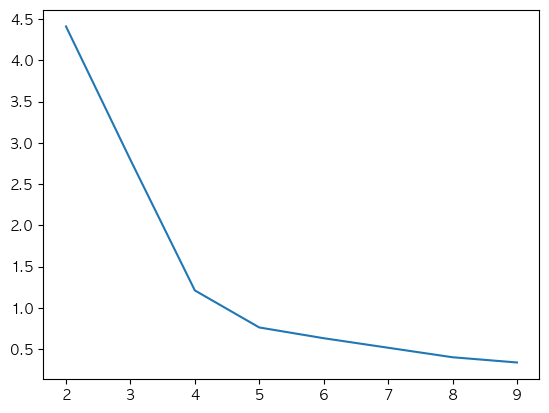

In [1473]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
data = kop[kop.loc[:,"총인구":"도매 및 소매업 신생"].columns]
    # 정규화 진행
scaler = MinMaxScaler()
data_scale = scaler.fit_transform(data)
scores = []
for k in range(2,10):
    km = KMeans(n_clusters=k,random_state=42)
    km.fit(data_scale)
    scores.append(km.inertia_)
plt.plot(range(2,10),scores)
plt.show()

In [1474]:
k = 4

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state = 10)

# 정규화된 데이터에 학습
model.fit(data_scale)
print(k)
# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
kop['cluster'] = model.fit_predict(data_scale)

4


In [1475]:
kop

,년도,시도,총인구,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,예금은행대출금액,예금액,cluster
0,2013,경기도,12234630,1821303,112129,286,739619,49143,248468.3,13718.5,2
1,2013,서울특별시,10143645,1620640,84066,395,469392,48097,462443.1,532689.2,1
2,2013,경상남도,3333820,423864,29504,65,190166,12612,57288.6,6703.3,3
3,2013,부산광역시,3527635,496161,25831,82,160821,13902,77411.6,59554.5,3
4,2013,대구광역시,2501588,363224,19340,86,136309,9981,46578.5,37541.7,3
...,...,...,...,...,...,...,...,...,...,...,...
131,2020,충청북도,1600837,226441,8607,40,85135,6103,28669.1,27669.5,0
132,2020,대전광역시,1463882,243418,7481,44,79807,6405,39341.3,38725.4,0
133,2020,강원도,1542840,217897,7835,32,73478,5554,22831.4,23634.2,0
134,2020,제주특별자치도,674635,94736,3989,23,40575,2856,20182.3,14025.4,0


4


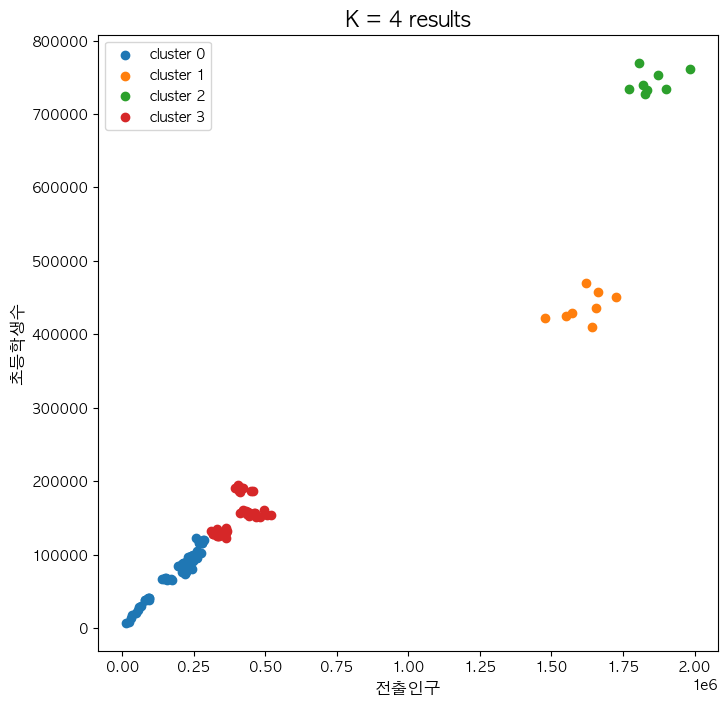

In [1476]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))

for i in range(k):
    plt.scatter(kop.loc[kop['cluster'] == i, '전출인구'], kop.loc[kop['cluster'] == i, '초등학생인원수'], 
                label = 'cluster ' + str(i))
print(k)
plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('전출인구', size = 12)
plt.ylabel('초등학생수', size = 12)
plt.show()

In [1477]:
kop['cluster'] = kop['cluster'] + 10
kop_temp = kop.sort_values(by="전출인구", ascending=True)
temp_list = kop_temp['cluster'].unique()
i = 3
for temp in temp_list:
    kop['cluster'][kop['cluster'] == temp] = i
    i-=1
kop['cluster'] = np.round(kop['cluster'] / 3, 2)
kop['cluster'].unique()

array([0.  , 0.33, 0.67, 1.  ])

In [1478]:
# kop.loc[kop['cluster'] == 0,"cluster_id"] = 1
# kop.loc[kop['cluster'] == 3,"cluster_id"] = 0.66
# kop.loc[kop['cluster'] == 1,"cluster_id"] = 0.33
# kop.loc[kop['cluster'] == 2,"cluster_id"] = 0
# Integration.loc[Integration['cluster'] == 1.00,"위험지수"] = '소멸진행' predict proba

In [1479]:
kop.head(12)

,년도,시도,총인구,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,예금은행대출금액,예금액,cluster
0,2013,경기도,12234630,1821303,112129,286,739619,49143,248468.3,13718.5,0.00
1,2013,서울특별시,10143645,1620640,84066,395,469392,48097,462443.1,532689.2,0.33
2,2013,경상남도,3333820,423864,29504,65,190166,12612,57288.6,6703.3,0.67
3,2013,부산광역시,3527635,496161,25831,82,160821,13902,77411.6,59554.5,0.67
4,2013,대구광역시,2501588,363224,19340,86,136309,9981,46578.5,37541.7,0.67
5,2013,인천광역시,2879782,439578,25560,69,157918,11522,62378.3,31197.4,0.67
6,2013,전라북도,1872965,260395,14555,52,105135,6935,22597.6,15924.7,1.00
7,2013,경상북도,2699440,330983,22206,57,135237,9127,28452.3,35242.6,0.67
8,2013,광주광역시,1472910,229288,12729,45,96055,6342,23082.8,18041.6,1.00
9,2013,충청남도,2047631,268053,18628,47,116216,7662,26445.4,17957.6,1.00


In [1499]:
kop[kop["시도"]=="전라남도"]

,년도,시도,총인구,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,예금은행대출금액,예금액,cluster
10,2013,전라남도,1907172,246635,15401,24,99206,6356,15968.2,24216.2,1.0
27,2014,전라남도,1905780,260874,14817,23,95720,6799,17164.0,25822.9,1.0
44,2015,전라남도,1908996,246168,15061,22,94368,6819,19216.7,28207.6,1.0
61,2016,전라남도,1903914,237337,13980,22,92981,7205,20060.0,30487.5,1.0
78,2017,전라남도,1896424,230551,12354,21,93233,7308,21010.3,30995.6,1.0
95,2018,전라남도,1882970,232414,11238,19,94134,6157,22228.8,32334.2,1.0
112,2019,전라남도,1868745,233271,10832,19,94952,6796,23785.6,34777.2,1.0
129,2020,전라남도,1851549,248770,9738,18,92405,6948,26806.6,36756.8,1.0


In [1481]:
kop.columns

Index(['년도', '시도', '총인구', '전출인구', '출생아수', '산부인과의원수', '초등학생인원수', '도매 및 소매업 신생',
       '예금은행대출금액', '예금액', 'cluster'],
      dtype='object')

In [1482]:
from sklearn.model_selection import train_test_split
x = kop[['총인구','전출인구', '출생아수', '산부인과의원수', '초등학생인원수', '도매 및 소매업 신생'	
       ]]
# '예금은행대출금액', '예금액'
y = kop[['cluster']]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

In [1483]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train, y_train) 
#24	99206	6356	15968.2	24216.2
# 12234630	1821303	112129	286	739619	49143	248468.3	13718.5 /// 2013 경기
# 13427014	1984199	77737	265	761731	63145
# 1907172	246635	15401	24	99206	6356	 2013 전라남도
# 1851549	248770	9738	18	92405	6948     2020 전라남도
# 1851549	248770	9738	18	92405	6948	26806.6	36756.8	 2020 junNam


LinearRegression()

In [1484]:
my_apartment = [[1851549,248770, 9738, 18, 92405, 6948]] # 2013 년 경기도 0.03940151
my_predict = mlr.predict(my_apartment)
my_predict
# ,26806.6,36756.8

array([[0.89293622]])

-----
### 년도별 변화를 알아보자
- 0 ~ 1 
- 1에 가까울 수록 소멸가능성이 높음

In [1485]:
# 2013 년 경기도 0.03940151
# 2020 년 경기도 0.0014608
# 2013 년 전라남도 0.85778728
# 2020 년 전라남도 0.88655266

In [1486]:
y_predict = mlr.predict(x_test)

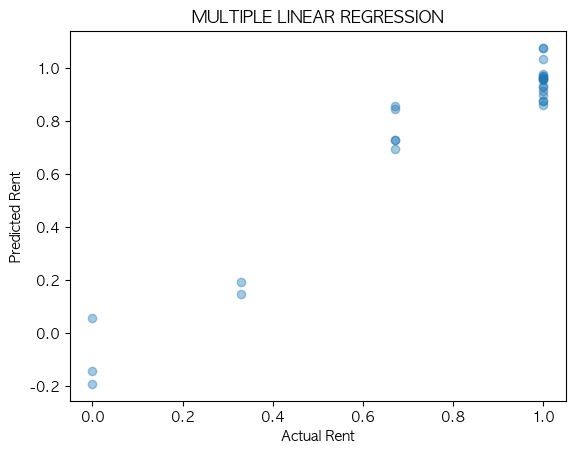

In [1487]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual Rent")
plt.ylabel("Predicted Rent")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

In [1488]:
print("Train :",mlr.score(x_train,y_train))
print("Test :",mlr.score(x_test,y_test))

Train : 0.876001178078341
Test : 0.909679055775335


---
### 교차검증

In [1519]:
kop_so =  kop.sort_values(by="cluster", ascending=False)
# kop_so = 

In [1520]:
data =kop_so[['총인구','전출인구', '출생아수', '산부인과의원수', '초등학생인원수', '도매 및 소매업 신생'	
       ]]
label = kop_so['cluster']
from sklearn import svm, model_selection
clf = svm.SVC()

In [1521]:
data = data.astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136 entries, 135 to 68
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   총인구          136 non-null    float64
 1   전출인구         136 non-null    float64
 2   출생아수         136 non-null    float64
 3   산부인과의원수      136 non-null    float64
 4   초등학생인원수      136 non-null    float64
 5   도매 및 소매업 신생  136 non-null    float64
dtypes: float64(6)
memory usage: 7.4 KB


In [1522]:
label = label.astype(object)
label.info()

<class 'pandas.core.series.Series'>
Int64Index: 136 entries, 135 to 68
Series name: cluster
Non-Null Count  Dtype 
--------------  ----- 
136 non-null    object
dtypes: object(1)
memory usage: 2.1+ KB


In [1523]:
scores = model_selection.cross_val_score(clf,data,label,cv=4)

scores

array([nan, nan, nan, nan])

In [1524]:
scores.mean()


nan

---
### 정규화 하여 테스트 해보자

In [1489]:
kop

,년도,시도,총인구,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,예금은행대출금액,예금액,cluster
0,2013,경기도,12234630,1821303,112129,286,739619,49143,248468.3,13718.5,0.00
1,2013,서울특별시,10143645,1620640,84066,395,469392,48097,462443.1,532689.2,0.33
2,2013,경상남도,3333820,423864,29504,65,190166,12612,57288.6,6703.3,0.67
3,2013,부산광역시,3527635,496161,25831,82,160821,13902,77411.6,59554.5,0.67
4,2013,대구광역시,2501588,363224,19340,86,136309,9981,46578.5,37541.7,0.67
...,...,...,...,...,...,...,...,...,...,...,...
131,2020,충청북도,1600837,226441,8607,40,85135,6103,28669.1,27669.5,1.00
132,2020,대전광역시,1463882,243418,7481,44,79807,6405,39341.3,38725.4,1.00
133,2020,강원도,1542840,217897,7835,32,73478,5554,22831.4,23634.2,1.00
134,2020,제주특별자치도,674635,94736,3989,23,40575,2856,20182.3,14025.4,1.00


In [1490]:
# 정규화를 진행할 컬럼 설정
col = ['총인구','전출인구','출생아수','산부인과의원수','초등학생인원수',"도매 및 소매업 신생","예금은행대출금액","예금액"]
x = kop[col].values
x

array([[1.2234630e+07, 1.8213030e+06, 1.1212900e+05, ..., 4.9143000e+04,
        2.4846830e+05, 1.3718500e+04],
       [1.0143645e+07, 1.6206400e+06, 8.4066000e+04, ..., 4.8097000e+04,
        4.6244310e+05, 5.3268920e+05],
       [3.3338200e+06, 4.2386400e+05, 2.9504000e+04, ..., 1.2612000e+04,
        5.7288600e+04, 6.7033000e+03],
       ...,
       [1.5428400e+06, 2.1789700e+05, 7.8350000e+03, ..., 5.5540000e+03,
        2.2831400e+04, 2.3634200e+04],
       [6.7463500e+05, 9.4736000e+04, 3.9890000e+03, ..., 2.8560000e+03,
        2.0182300e+04, 1.4025400e+04],
       [3.5583100e+05, 6.5909000e+04, 3.4680000e+03, ..., 1.3610000e+03,
        9.8647000e+03, 2.5173430e+05]])

In [1491]:
# 최대값과 최소값 가져오기 instance
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
x_scaler= min_max_scaler.fit_transform(x.astype(float))
x_scaler

array([[0.91037982, 0.91727346, 0.98784524, ..., 0.77675027, 0.33995758,
        0.01377642],
       [0.75322035, 0.815367  , 0.73813888, ..., 0.76007271, 0.6356111 ,
        0.59233204],
       [0.2413905 , 0.20758574, 0.25264272, ..., 0.19429519, 0.07580053,
        0.00595578],
       ...,
       [0.10677954, 0.10298564, 0.05983058, ..., 0.08176151, 0.02819029,
        0.02483058],
       [0.04152482, 0.04043848, 0.02560863, ..., 0.03874424, 0.02452997,
        0.01411856],
       [0.01756336, 0.02579872, 0.02097274, ..., 0.01490776, 0.01027393,
        0.27911969]])

In [1492]:
# 정규화된 범죄건수가 있는 데이터프레임 생성
crime_anal_norm = pd.DataFrame(x_scaler, columns=col, index=kop.index)
crime_anal_norm

,총인구,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,예금은행대출금액,예금액
0,0.910380,0.917273,0.987845,0.722646,0.960500,0.776750,0.339958,0.013776
1,0.753220,0.815367,0.738139,1.000000,0.606175,0.760073,0.635611,0.592332
2,0.241390,0.207586,0.252643,0.160305,0.240051,0.194295,0.075801,0.005956
3,0.255958,0.244302,0.219960,0.203562,0.201574,0.214863,0.103605,0.064875
4,0.178840,0.176790,0.162203,0.213740,0.169433,0.152346,0.061002,0.040335
...,...,...,...,...,...,...,...,...
131,0.111139,0.107325,0.066700,0.096692,0.102333,0.090515,0.036256,0.029329
132,0.100845,0.115946,0.056681,0.106870,0.095347,0.095330,0.051002,0.041654
133,0.106780,0.102986,0.059831,0.076336,0.087049,0.081762,0.028190,0.024831
134,0.041525,0.040438,0.025609,0.053435,0.043906,0.038744,0.024530,0.014119


In [1493]:
col2 = ['cluster','년도','시도']
crime_anal_norm[col2] = kop[col2]
crime_anal_norm.head()

,총인구,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,예금은행대출금액,예금액,cluster,년도,시도
0,0.910380,0.917273,0.987845,0.722646,0.960500,0.776750,0.339958,0.013776,0.00,2013,경기도
1,0.753220,0.815367,0.738139,1.000000,0.606175,0.760073,0.635611,0.592332,0.33,2013,서울특별시
2,0.241390,0.207586,0.252643,0.160305,0.240051,0.194295,0.075801,0.005956,0.67,2013,경상남도
3,0.255958,0.244302,0.219960,0.203562,0.201574,0.214863,0.103605,0.064875,0.67,2013,부산광역시
4,0.178840,0.176790,0.162203,0.213740,0.169433,0.152346,0.061002,0.040335,0.67,2013,대구광역시


In [1494]:
Korea = crime_anal_norm

In [1495]:
from sklearn.model_selection import train_test_split
x2 = Korea[['총인구','전출인구', '출생아수', '산부인과의원수', '초등학생인원수', '도매 및 소매업 신생'
       ]]
# ,'예금은행대출금액','예금액'	
y2 = Korea[['cluster']]
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, train_size=0.8, test_size=0.2)

In [1496]:
from sklearn.linear_model import LinearRegression
mlr2 = LinearRegression()
mlr2.fit(x2_train, y2_train) 

LinearRegression()

In [1497]:
print("Train :",mlr2.score(x2_train,y2_train))
print("Test :",mlr2.score(x2_test,y2_test))

Train : 0.8918175070242893
Test : 0.8786630350364119
